In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import fipy as fp

In [4]:
from matplotlibElPhFViewer import MatplotlibElPhFViewer
def viewElPhF(filename, L="3.2 nm", nx=1200):
    L = fp.Variable(L)
    dx = L / nx
    mesh = fp.Grid1D(nx=nx, dx=dx/L)

    xi = fp.CellVariable(mesh=mesh, name=r"$\xi$")
    phi = fp.CellVariable(mesh=mesh, name=r"$\phi$")  
    interstitials = [
        fp.CellVariable(mesh=mesh, name="$e^-$")
    ]

    substitutionals = [
        fp.CellVariable(mesh=mesh, name="$M^+$"),
        fp.CellVariable(mesh=mesh, name="$A^-$")
    ]

    N = fp.CellVariable(mesh=mesh, name="$N$")
    
    components = interstitials + substitutionals + [N]
    
    for j in components:
        j.Y = fp.CellVariable(mesh=mesh, name=j.name)

    interstitials[0].z   = -1
    substitutionals[0].z = +2
    substitutionals[1].z = -2
    N.z                  = 0

                         
    values = fp.numerix.loadtxt(filename, skiprows=1, unpack=True)
    
    xi.setValue(values[1])
    phi.setValue(values[2])
    
    _start = 3
    for j, mu in zip(interstitials + substitutionals,
                     values[_start:_start+len(interstitials + substitutionals)]):
        j.setValue(mu)

    _start = 3 + len(interstitials + substitutionals)
    for j, Y in zip(components,
                     values[_start:_start+len(components)]):
        j.Y.setValue(Y)

    charge = fp.CellVariable(mesh=mesh, value=N.z)
    for i in interstitials + substitutionals:
        charge += i.z * i.Y

    viewer = MatplotlibElPhFViewer(phase=xi,
                           potential=phi,
                           components=[i.Y for i in components],
                           charge=charge,
                           potentials=[i - i[...,0] for i in interstitials + substitutionals],
                           limits={
                               'phasemax':1.,
                               'phasemin':0.,
                           })


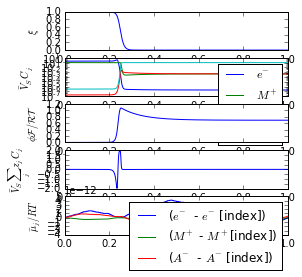

In [142]:
viewElPhF("0.0_V.tsv")

In [5]:
%%bash

smt configure --executable=python
smt configure --labelgenerator=uuid
smt configure --on-changed=store-diff
smt configure --addlabel=parameters


Multiple versions found, using /data/ame2/miniconda/envs/fipy/bin/python. If you wish to use a different version, please specify it explicitly
Multiple versions found, using /data/ame2/miniconda/envs/fipy/bin/python. If you wish to use a different version, please specify it explicitly


In [5]:
!pwd

/data/ame2/diffcap


In [6]:
import json
import os
import glob

In [7]:
!smt export
with open(".smt/records_export.json") as ff:
    data = json.load(ff)
    
df = pd.DataFrame(data)

In [34]:
df.keys()

Index([u'datastore', u'dependencies', u'diff', u'duration', u'executable',
       u'input_data', u'input_datastore', u'label', u'launch_mode',
       u'main_file', u'outcome', u'output_data', u'parameters', u'platforms',
       u'reason', u'repeats', u'repository', u'script_arguments',
       u'stdout_stderr', u'tags', u'timestamp', u'user', u'version'],
      dtype='object')

In [90]:
df[["label","main_file","parameters","repeats"]]

,label,main_file,parameters,repeats
0,054fd495d2fa,elphf0237.py,"{u'content': u'{ ""concentration"": ""0.01 mo...",None
1,03dcf83f985e,elphf0237.py,"{u'content': u'{ ""concentration"": ""0.01 mo...",None
2,ad7404ed9fec,elphf0237.py,"{u'content': u'{ ""concentration"": ""0.01 mo...",None
3,38a88a756456,elphf0237.py,"{u'content': u'{ ""concentration"": ""0.01 mo...",None
4,fba053356f40,elphf0237.py,"{u'content': u'{ ""concentration"": ""0.01 mo...",None
5,d784cba72269,elphf0237.py,"{u'content': u'{ ""concentration"": ""0.01 mo...",None
6,954434a2c58e,elphf0237.py,"{u'content': u'{ ""concentration"": ""0.01 mo...",None
7,70cf29ce5b0b,elphf0237.py,"{u'content': u'{ ""concentration"": ""0.01 mo...",None
8,15a610a037c6,elphf0237.py,"{u'content': u'{ ""concentration"": ""0.01 mo...",None
9,226bba77a230,elphf0237.py,"{u'content': u'{ ""concentration"": ""0.01 mo...",None


In [9]:
def ppprint(s):
    print type(s)

In [8]:
def get_concentration(d):
    return json.loads(d["content"])['concentration']

In [9]:
def parameters2json(d):
    return json.loads(d["content"])

In [135]:
df["concentration"] = df["parameters"].apply(get_concentration)

In [10]:
#pulls parameters and for all simulations
df2 = pd.DataFrame(list(df["parameters"].apply(parameters2json)))

In [42]:
df2

,concentration,galvani_potential,ncells,outer_sweeps,relaxation,sumatra_label
0,10.0 mol/l,0.111111111111 V,1200,7,1,77737e4dae31
1,10.0 mol/l,0.106060606061 V,1200,7,1,672fe412fe34
2,10.0 mol/l,0.10101010101 V,1200,7,1,bd17285bb1e5
3,10.0 mol/l,0.0959595959596 V,1200,7,1,3f1c908476a2
4,10.0 mol/l,0.0909090909091 V,1200,7,1,45e56badd64c
5,10.0 mol/l,0.0858585858586 V,1200,7,1,35c137bcbb4a
6,10.0 mol/l,0.0808080808081 V,1200,7,1,a676d6bb48de
7,10.0 mol/l,0.0757575757576 V,1200,7,1,19756a82874b
8,10.0 mol/l,0.0707070707071 V,1200,7,1,bdb5b061b799
9,10.0 mol/l,0.0656565656566 V,1200,7,1,89c44dbfe398


In [11]:
df3 = pd.DataFrame(list(df["main_file"]))

In [12]:
df4=pd.concat([df2, df3], axis=1)

In [13]:
df4.columns = ['concentration','galvani_potential','ncells','outer_sweepes','relaxation','sumatra_label','main_file']

In [14]:
#separates 0.25 mol/l and 120 cells from files
df0226 = df4[(df4["main_file"]=="elphf0226.py")]

In [35]:
df0226

,concentration,galvani_potential,ncells,outer_sweepes,relaxation,sumatra_label,main_file
2215,0.25 mol/l,0.5 V,12000,10,1,7917bd4e77a0,elphf0226.py
2216,0.25 mol/l,0.473684210526 V,12000,10,1,03e056ad37b9,elphf0226.py
2217,0.25 mol/l,0.447368421053 V,12000,10,1,c7c5440dcd61,elphf0226.py
2218,0.25 mol/l,0.421052631579 V,12000,10,1,d2776d668f21,elphf0226.py
2219,0.25 mol/l,0.394736842105 V,12000,10,1,0b6d2adfd09f,elphf0226.py
2220,0.25 mol/l,0.368421052632 V,12000,10,1,1dfaa30a517e,elphf0226.py
2221,0.25 mol/l,0.342105263158 V,12000,10,1,dbfc7438f67e,elphf0226.py
2222,0.25 mol/l,0.315789473684 V,12000,10,1,47d9c95d87bb,elphf0226.py
2223,0.25 mol/l,0.289473684211 V,12000,10,1,01af157dc3a7,elphf0226.py
2224,0.25 mol/l,0.263157894737 V,12000,10,1,aec7c12828f2,elphf0226.py


In [15]:
#separates files from elphf0238 simulations
df0237 = df4[(df4["main_file"]=="elphf0237.py")]
df0237

,concentration,galvani_potential,ncells,outer_sweepes,relaxation,sumatra_label,main_file
883,0.10 mol/l,0.5 V,1200,7,1,62617875f931,elphf0237.py
884,0.10 mol/l,0.494949494949 V,1200,7,1,d7b38b013c5f,elphf0237.py
885,0.10 mol/l,0.489898989899 V,1200,7,1,e04ff5860232,elphf0237.py
886,0.10 mol/l,0.484848484848 V,1200,7,1,4b83b96a6c33,elphf0237.py
887,0.10 mol/l,0.479797979798 V,1200,7,1,47b60a8358af,elphf0237.py
888,0.10 mol/l,0.474747474747 V,1200,7,1,a6aad4b8b017,elphf0237.py
889,0.10 mol/l,0.469696969697 V,1200,7,1,1acff738eaa0,elphf0237.py
890,0.10 mol/l,0.464646464646 V,1200,7,1,b527829cc8fe,elphf0237.py
891,0.10 mol/l,0.459595959596 V,1200,7,1,8e6333715437,elphf0237.py
892,0.10 mol/l,0.454545454545 V,1200,7,1,5982ba334ab7,elphf0237.py


In [16]:
df02371 = df4[(df4["main_file"]=="elphf0237.py")&(df4["concentration"]=="1.00 mol/l")]

In [17]:
#separates files from elphf0238 simulations
df0238 = df4[(df4["main_file"]=="elphf0238.py")]
df0238

,concentration,galvani_potential,ncells,outer_sweepes,relaxation,sumatra_label,main_file
2,10.0 mol/l,0.5 V,1200,10,1,dacaffc405d5,elphf0238.py
3,10.0 mol/l,0.495 V,1200,10,1,9bea046fdbcf,elphf0238.py
4,10.0 mol/l,0.49 V,1200,10,1,dfd4f80144f5,elphf0238.py
5,10.0 mol/l,0.485 V,1200,10,1,a8a271557a67,elphf0238.py
6,10.0 mol/l,0.48 V,1200,10,1,923a08858fbe,elphf0238.py
7,10.0 mol/l,0.475 V,1200,10,1,7e8aa9ab33ca,elphf0238.py
8,10.0 mol/l,0.47 V,1200,10,1,af6c8f172c02,elphf0238.py
9,10.0 mol/l,0.465 V,1200,10,1,8dfb76b803ed,elphf0238.py
10,10.0 mol/l,0.46 V,1200,10,1,65438f734413,elphf0238.py
11,10.0 mol/l,0.455 V,1200,10,1,668d4c1c1ab4,elphf0238.py


In [18]:
df02381 = df4[(df4["main_file"]=="elphf0238.py")&(df4["concentration"]=="0.25 mol/l")]

In [19]:
#separates files from elphf0238 simulations
df0239 = df4[(df4["main_file"]=="elphf0239.py")]
df0239

,concentration,galvani_potential,ncells,outer_sweepes,relaxation,sumatra_label,main_file
583,10.0 mol/l,0.5 V,1200,10,1,2c17bfe8ca76,elphf0239.py
584,10.0 mol/l,0.494949494949 V,1200,10,1,7fef4b6c6e10,elphf0239.py
585,10.0 mol/l,0.489898989899 V,1200,10,1,3bd57b11b04e,elphf0239.py
586,10.0 mol/l,0.484848484848 V,1200,10,1,39828aba5220,elphf0239.py
587,10.0 mol/l,0.479797979798 V,1200,10,1,f4cca759e248,elphf0239.py
588,10.0 mol/l,0.474747474747 V,1200,10,1,22823a7f980a,elphf0239.py
589,10.0 mol/l,0.469696969697 V,1200,10,1,912bc947a5da,elphf0239.py
590,10.0 mol/l,0.464646464646 V,1200,10,1,6ea3751b6d50,elphf0239.py
591,10.0 mol/l,0.459595959596 V,1200,10,1,22a82d183836,elphf0239.py
592,10.0 mol/l,0.454545454545 V,1200,10,1,765033571d19,elphf0239.py


In [20]:
df02391 = df4[(df4["main_file"]=="elphf0239.py")&(df4["concentration"]=="1.00 mol/l")]

In [21]:
#separates files from elphf0238 simulations
df0240 = df4[(df4["main_file"]=="elphf0240.py")]
df0240

,concentration,galvani_potential,ncells,outer_sweepes,relaxation,sumatra_label,main_file
354,1.00 mol/l,0.5 V,1200,10,1,f156e2d42ce2,elphf0240.py
355,1.00 mol/l,0.494949494949 V,1200,10,1,ed0812fbadff,elphf0240.py
356,1.00 mol/l,0.489898989899 V,1200,10,1,13bf915f194c,elphf0240.py
357,1.00 mol/l,0.484848484848 V,1200,10,1,b6b970e770da,elphf0240.py
358,1.00 mol/l,0.479797979798 V,1200,10,1,7e526fcfde2f,elphf0240.py
359,1.00 mol/l,0.474747474747 V,1200,10,1,e13d7a606203,elphf0240.py
360,1.00 mol/l,0.469696969697 V,1200,10,1,837a8b151963,elphf0240.py
361,1.00 mol/l,0.464646464646 V,1200,10,1,c831f5628f17,elphf0240.py
362,1.00 mol/l,0.459595959596 V,1200,10,1,1228fd0e40e8,elphf0240.py
363,1.00 mol/l,0.454545454545 V,1200,10,1,d3fd98017575,elphf0240.py


In [22]:
def load_result(label):
    result = fp.numerix.loadtxt(os.path.join("Data", label, "test.txt"))
    return dict(scaled_galvani_potential=result[0], surface_energy=result[1], surface_charge=result[2])

In [23]:
df5 = pd.DataFrame(list(df0226["sumatra_label"].apply(load_result)),index=df0226.index)

In [24]:
df0237r = pd.DataFrame(list(df0237["sumatra_label"].apply(load_result)),index=df0237.index)

In [25]:
df02371r = pd.DataFrame(list(df02371["sumatra_label"].apply(load_result)),index=df02371.index)

In [26]:
df0238r = pd.DataFrame(list(df0238["sumatra_label"].apply(load_result)),index=df0238.index)

In [27]:
df02381r = pd.DataFrame(list(df02381["sumatra_label"].apply(load_result)),index=df02381.index)

In [28]:
df0239r = pd.DataFrame(list(df0239["sumatra_label"].apply(load_result)),index=df0239.index)

In [29]:
df02391r = pd.DataFrame(list(df02391["sumatra_label"].apply(load_result)),index=df02391.index)

In [51]:
df0240r = pd.DataFrame(list(df0240["sumatra_label"].apply(load_result)),index=df0240.index)

IOError: [Errno 2] No such file or directory: u'Data/f156e2d42ce2/test.txt'

In [99]:
errorcheck = df02381r[(df02381["galvani_potential"] == "0.0 V")]
errorcheck

,scaled_galvani_potential,surface_charge,surface_energy
482,0,-0.003576,0.476367
533,0,-0.003576,0.476367
1060,0,-0.003576,0.476367


In [100]:
df02381.loc[961:1060]

,concentration,galvani_potential,ncells,outer_sweepes,relaxation,sumatra_label,main_file
961,0.25 mol/l,0.5 V,1200,10,1,f933cfed40bb,elphf0238.py
962,0.25 mol/l,0.494949494949 V,1200,10,1,6fc5c15a704c,elphf0238.py
963,0.25 mol/l,0.489898989899 V,1200,10,1,8b9f80529324,elphf0238.py
964,0.25 mol/l,0.484848484848 V,1200,10,1,7197d7aebe41,elphf0238.py
965,0.25 mol/l,0.479797979798 V,1200,10,1,35129eda560d,elphf0238.py
966,0.25 mol/l,0.474747474747 V,1200,10,1,1ec51602a4cc,elphf0238.py
967,0.25 mol/l,0.469696969697 V,1200,10,1,fcbbb0016f94,elphf0238.py
968,0.25 mol/l,0.464646464646 V,1200,10,1,f873742d8358,elphf0238.py
969,0.25 mol/l,0.459595959596 V,1200,10,1,21ed7a891d6f,elphf0238.py
970,0.25 mol/l,0.454545454545 V,1200,10,1,7399bfb0a14a,elphf0238.py


In [28]:
df5

,scaled_galvani_potential,surface_charge,surface_energy
837,19.470646,0.092097,-0.395987
838,18.445875,0.088585,-0.303398
839,17.421104,0.084944,-0.214472
840,16.396333,0.074656,-0.435831
841,15.371562,0.010830,-0.238702
842,14.346791,0.011875,-0.230884
843,13.322021,0.068704,0.101483
844,12.297250,0.064091,0.169548
845,11.272479,0.059188,0.232741
846,10.247708,0.053960,0.290746


In [60]:
#interpolates data from 1200 cell files
from scipy.interpolate import interp1d
v1200interp = interp1d(v1200["scaled_galvani_potential"],v1200["surface_energy"])

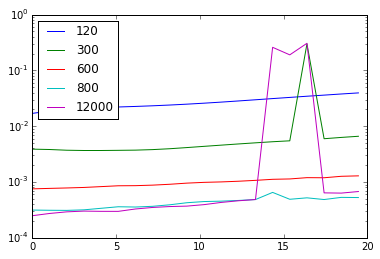

In [61]:
#plots difference in surface energy for different number of cells compared to 1200 cells. 
for ncells in [120,300,600,800,12000]:
    vn = df5[(df0226["concentration"] == "0.25 mol/l")&(df0226["ncells"]==ncells)]
    plt.semilogy(vn["scaled_galvani_potential"],abs(v1200interp(vn["scaled_galvani_potential"])-vn["surface_energy"]),label="{}".format(ncells))
plt.legend(loc="upper left")

In [33]:
from scipy.interpolate import interp1d
v1200interp = interp1d(v1200["scaled_galvani_potential"],v1200["surface_charge"])

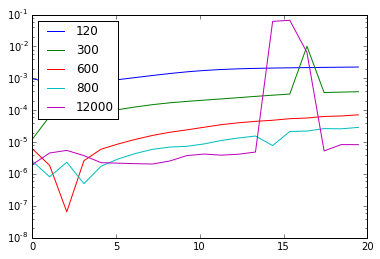

In [34]:
#plots difference in surface charge for different number of cells compared to 1200
for ncells in [120,300,600,800,12000]:
    vn = df5[(df0226["concentration"] == "0.25 mol/l")&(df0226["ncells"]==ncells)]
    plt.semilogy(vn["scaled_galvani_potential"#plots diffcap for various concentrations
plt.ylim(ymin=-0.01,ymax=0.01)],abs(v1200interp(vn["scaled_galvani_potential"])-vn["surface_charge"]),label="{}".format(ncells))
plt.legend(loc="upper left")

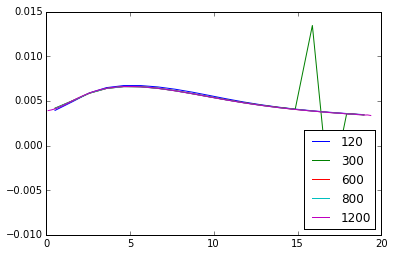

In [50]:
for ncells in [120,300,600,800,1200]:
    vn = df5[(df0226["concentration"] == "0.25 mol/l")&(df0226["ncells"]==ncells)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    gp = np.array(vn["scaled_galvani_potential"])
    plt.plot((gp[:-1]+gp[1:])/2,diffcap,label="{}".format(ncells))
plt.legend(loc="lower right")

# Divalent

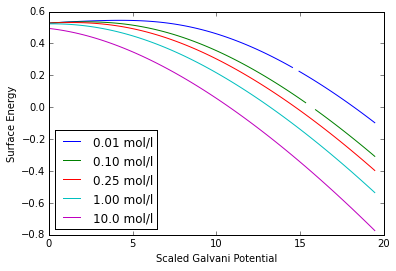

In [83]:
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    plt.plot(vn["scaled_galvani_potential"],vn["surface_energy"],label="{}".format(c))
plt.xlabel('Scaled Galvani Potential')
plt.ylabel('Surface Energy')
plt.legend(loc="lower left")

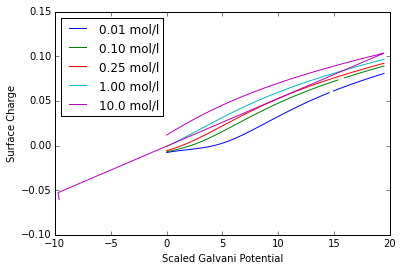

In [31]:
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    plt.plot(vn["scaled_galvani_potential"],vn["surface_charge"],label="{}".format(c))
plt.legend(loc="upper left")
plt.xlabel('Scaled Galvani Potential')
plt.ylabel('Surface Charge')

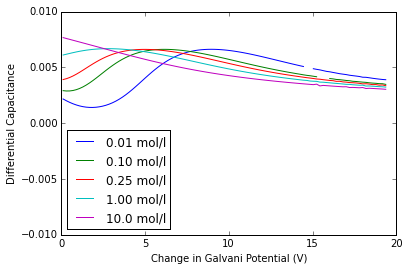

In [131]:
#plots diffcap for various concentrations
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    gp = np.array(vn["scaled_galvani_potential"])
    plt.plot((gp[:-1]+gp[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)
plt.xlabel('Change in Galvani Potential (V)')
plt.ylabel('Differential Capacitance')

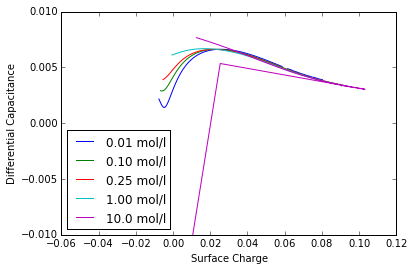

In [30]:
#plots diffcap for various concentrations
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    plt.plot((sc[:-1]+sc[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)
plt.xlabel('Surface Charge')
plt.ylabel('Differential Capacitance')

# 0237 divalent more defects

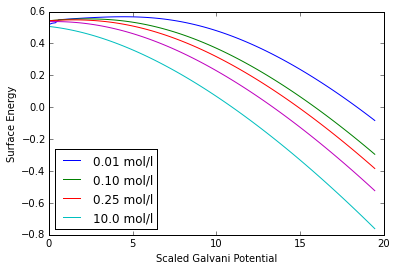

In [73]:
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","10.0 mol/l"]:
    vn = df0237r[(df0237["concentration"]==c)&(df0237["ncells"]==1200)]
    plt.plot(vn["scaled_galvani_potential"],vn["surface_energy"],label="{}".format(c))
plt.xlabel('Scaled Galvani Potential')
plt.ylabel('Surface Energy')
plt.legend(loc="lower left")
c1 = df02371r.loc[1011:1110][(df02371.loc[1011:1110]["concentration"]=="1.00 mol/l")]
plt.plot(c1["scaled_galvani_potential"],c1["surface_energy"],label="{}".format(c))

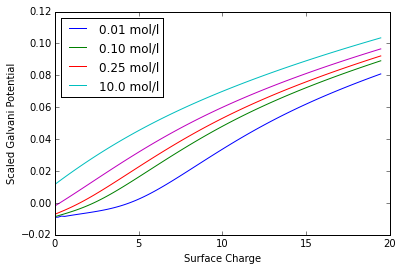

In [50]:
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","10.0 mol/l"]:
    vn = df0237r[(df0237["concentration"]==c)]
    plt.plot(vn["scaled_galvani_potential"],vn["surface_charge"],label="{}".format(c))
plt.legend(loc="upper left")
plt.ylabel('Scaled Galvani Potential')
plt.xlabel('Surface Charge')
c1 = df02371r.loc[1011:1110][(df02371.loc[1011:1110]["concentration"]=="1.00 mol/l")]
plt.plot(c1["scaled_galvani_potential"],c1["surface_charge"],label="{}".format(c))

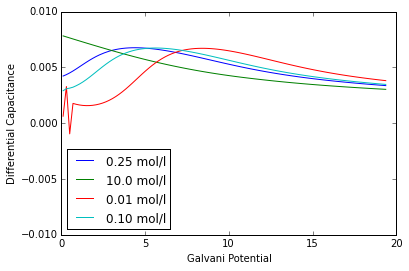

In [56]:
#plots diffcap for various concentrations
for c in ["0.25 mol/l","10.0 mol/l","0.01 mol/l","0.10 mol/l"]:
    vn = df0237r[(df0237["concentration"]==c)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    gp = np.array(vn["scaled_galvani_potential"])
    plt.plot((gp[:-1]+gp[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)

c1 = df02371r.loc[1011:1110][(df02371.loc[1011:1110]["concentration"]=="1.00 mol/l")]
diffcap1 = np.diff(c1["surface_charge"])/np.diff(c1["scaled_galvani_potential"])
gp1 = np.array(c1["scaled_galvani_potential"])
plt.plot((gp1[:-1]+gp1[1:])/2,diffcap1,label="{}".format(c))
plt.xlabel('Galvani Potential')
plt.ylabel('Differential Capacitance')

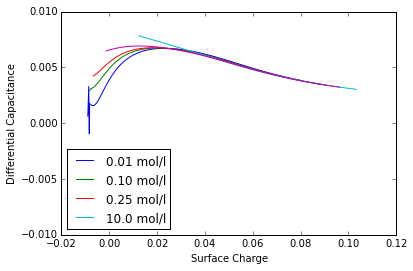

In [75]:
#plots diffcap for various concentrations
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","10.0 mol/l"]:
    vn = df0237r[(df0237["concentration"]==c)&(df0237["ncells"]==1200)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    plt.plot((sc[:-1]+sc[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)
plt.xlabel('Surface Charge')
plt.ylabel('Differential Capacitance')

c1 = df02371r.loc[1011:1110][(df02371.loc[1011:1110]["concentration"]=="1.00 mol/l")]
diffcap1 = np.diff(c1["surface_charge"])/np.diff(c1["scaled_galvani_potential"])
sc1 = np.array(c1["surface_charge"])
plt.plot((sc1[:-1]+sc1[1:])/2,diffcap1,label="{}".format(c))

In [109]:
#attempt at Parsons-Zobel df for 0237
sc = df0237r[(df0237r["surface_charge"]<0.03)]
#len(np.diff(1/sc["surface_charge"]))
pz = 1/(np.diff(sc["surface_charge"])/np.diff(sc["scaled_galvani_potential"]))

0.01 [4.0764649027596107, 4.2797992944999708, 4.3842298422020649] [3.3404119979698561, 3.3460057583868563, 3.3553079689927712]
0.0125 [4.2379196708405358, 4.3839046761341391, 4.4557200592803747] [4.1752350658791295, 4.1797117214377035, 4.1871621781287782]
0.015 [4.3505013806740278, 4.4508152048319056, 4.4975610741351559] [5.0100995956938288, 5.013830888427381, 5.020043546561813]
0.0175 [4.4242094811027224, 4.4872878144151249, 4.5153008801041334] [5.8449878208988011, 5.8481864578202662, 5.8535136351648438]
0.02 [4.465984791997335, 4.4996962165879415, 4.513218679062506] [6.6798908567729001, 6.6826898833759456, 6.6873523242762989]


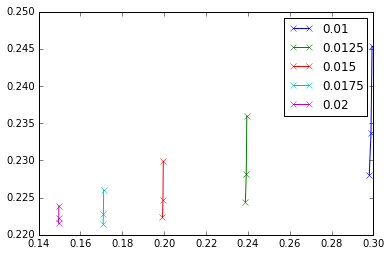

In [61]:
from scipy.interpolate import interp1d
interpolators=dict()

for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","10.0 mol/l"]:
    vn = df0237r[(df0237["concentration"]==c)&(df0237["ncells"]==1200)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    sc = (sc[:-1]+sc[1:])/2
    interpolators[c]=interp1d(sc,diffcap,bounds_error=False)
Lb = (fp.Variable("1 e")**2/(78.49*fp.Variable("1 eps0*kB")*fp.Variable("298 K"))).inBaseUnits()
for charge in [0.01,0.0125,0.015,0.0175,0.02]:
    C = []
    Cgc = []
    ChargeDim = charge*fp.Variable("3.2 nm")*fp.Variable("1 Nav*e")/fp.Variable("0.018 l/mol")
    CapacitanceScale = (fp.Variable("3.2 nm")*fp.Variable("1 Nav*e")**2/(fp.Variable("0.018 l/mol")*fp.Variable("1 Nav*kB")*fp.Variable("298 K"))/fp.Variable("1 F/m**2")).inBaseUnits()
    for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l"]:
        Ld = fp.numerix.sqrt(1/(8*fp.numerix.pi*Lb*c*(fp.Variable("1 Nav")))).inBaseUnits()
        sigmastar = (fp.Variable("1 e")/(2*fp.numerix.pi*Lb*Ld)).inBaseUnits()
        C.append(interpolators[c](charge)*CapacitanceScale)
        Cgc.append((78.49*fp.Variable("1 eps0")*Lb/(2*fp.Variable("1 e"))*fp.numerix.sqrt(ChargeDim**2+sigmastar**2)/fp.Variable("1 F/m**2")).inBaseUnits())
    print charge,C,Cgc
    plt.plot(fp.numerix.array(Cgc)**-1,fp.numerix.array(C)**-1,label="{}".format(charge),marker="x")
plt.legend()

# 0239 monovalent 

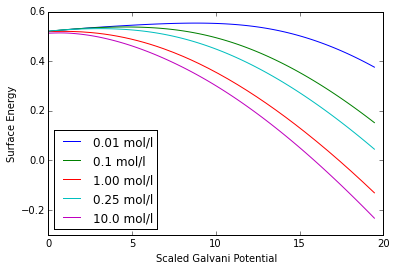

In [81]:
for c in ["0.01 mol/l","0.1 mol/l","1.00 mol/l","0.25 mol/l","10.0 mol/l"]:
    vn = df0239r[(df0239["concentration"]==c)&(df0239["ncells"]==1200)]
    plt.plot(vn["scaled_galvani_potential"],vn["surface_energy"],label="{}".format(c))
plt.xlabel('Scaled Galvani Potential')
plt.ylabel('Surface Energy')
plt.legend(loc="lower left")

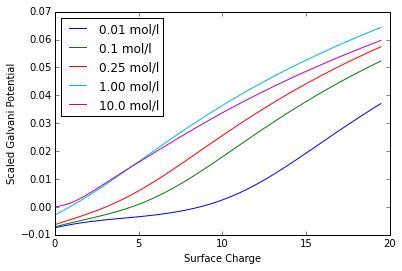

In [78]:
for c in ["0.01 mol/l","0.1 mol/l","0.25 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df0239r[(df0239["concentration"]==c)]
    plt.plot(vn["scaled_galvani_potential"],vn["surface_charge"],label="{}".format(c))
plt.legend(loc="upper left")
plt.ylabel('Scaled Galvani Potential')
plt.xlabel('Surface Charge')

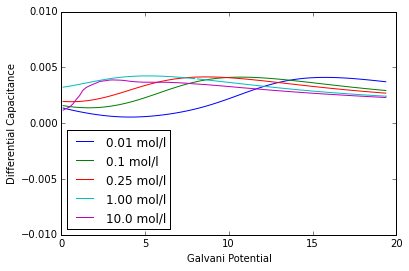

In [55]:
#plots diffcap for various concentrations
for c in ["0.01 mol/l","0.1 mol/l","0.25 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df0239r[(df0239["concentration"]==c)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    gp = np.array(vn["scaled_galvani_potential"])
    plt.plot((gp[:-1]+gp[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)
plt.xlabel('Galvani Potential')
plt.ylabel('Differential Capacitance')

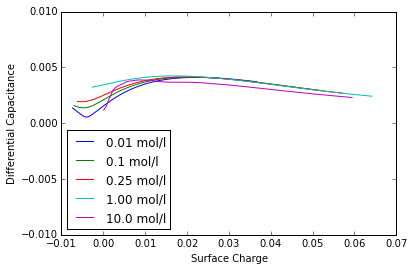

In [84]:
#plots diffcap for various concentrations
for c in ["0.01 mol/l","0.1 mol/l","0.25 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df0239r[(df0239["concentration"]==c)&(df0239["ncells"]==1200)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    plt.plot((sc[:-1]+sc[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)
plt.xlabel('Surface Charge')
plt.ylabel('Differential Capacitance')

# 0238 divalent, many defects

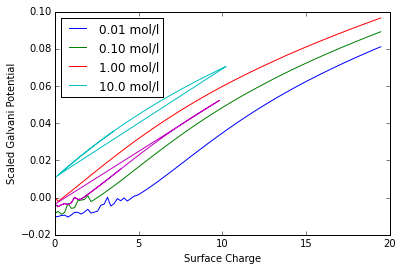

In [52]:
for c in ["0.01 mol/l","0.10 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df0238r[(df0238["concentration"]==c)]
    plt.plot(vn["scaled_galvani_potential"],vn["surface_charge"],label="{}".format(c))
plt.legend(loc="upper left")
plt.ylabel('Scaled Galvani Potential')
plt.xlabel('Surface Charge')

c1 = df02381r.loc[1438:1537][(df02381.loc[1438:1537]["concentration"]=="0.25 mol/l")]
plt.plot(c1["scaled_galvani_potential"],c1["surface_charge"],label="{}".format(c))

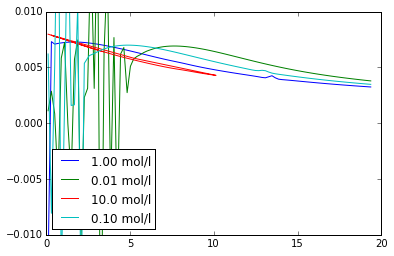

In [54]:
#plots diffcap for various concentrations
for c in ["1.00 mol/l","0.01 mol/l","10.0 mol/l","0.10 mol/l"]:
    vn = df0238r[(df0238["concentration"]==c)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    gp = np.array(vn["scaled_galvani_potential"])
    plt.plot((gp[:-1]+gp[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)

c1 = df02381r.loc[960:1061][(df02381.loc[960:1061]["concentration"]=="0.25 mol/l")]
diffcap1 = np.diff(c1["surface_charge"])/np.diff(c1["scaled_galvani_potential"])
gp1 = np.array(c1["scaled_galvani_potential"])
plt.plot((gp1[:-1]+gp1[1:])/2,diffcap1,label="{}".format(c))

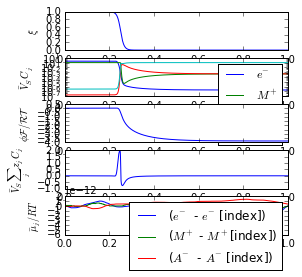

In [163]:
viewElPhF(os.path.join("Data", "17c4be819472", "output.tsv"))

In [253]:
time = df2[(df2["concentration"] == "0.25 mol/l")&(df2["galvani_potential"]=="0.5 V")]

In [254]:
time

,concentration,galvani_potential,ncells,outer_sweeps,relaxation,sumatra_label
duration,,,,,,
285.804225,0.25 mol/l,0.5 V,12000,10,1,7917bd4e77a0
85.474873,0.25 mol/l,0.5 V,120,10,1,797e80f85b5f
101.603450,0.25 mol/l,0.5 V,300,10,1,ee37a02bdead
83.267868,0.25 mol/l,0.5 V,600,10,1,2f642a03acc6
175.452215,0.25 mol/l,0.5 V,800,10,1,8da60444a189
85.520260,0.25 mol/l,0.5 V,1200,10,1,c7278979f934


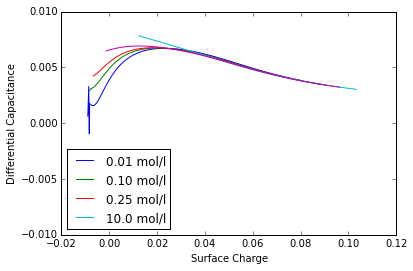

In [71]:
#plots diffcap for various concentrations
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","10.0 mol/l"]:
    vn = df0237r[(df0237["concentration"]==c)&(df0237["ncells"]==1200)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    plt.plot((sc[:-1]+sc[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)
plt.xlabel('Surface Charge')
plt.ylabel('Differential Capacitance')

c1 = df02371r.loc[1011:1110][(df02371.loc[1011:1110]["concentration"]=="1.00 mol/l")]
diffcap1 = np.diff(c1["surface_charge"])/np.diff(c1["scaled_galvani_potential"])
sc1 = np.array(c1["surface_charge"])
plt.plot((sc1[:-1]+sc1[1:])/2,diffcap1,label="{}".format(c))